In [1]:
import pandas as pd
import numpy as np
import dataframe_image as dfi
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def get_train_test_grocery_data():
    transactions_filepath = '/home/adrien/Téléchargements/dunnhumby/transaction_data.csv'
    products_filepath = '/home/adrien/Téléchargements/dunnhumby/product.csv'
    transactions_df = pd.read_csv(transactions_filepath)
    products_df = pd.read_csv(products_filepath)
    products_df.set_index('PRODUCT_ID', inplace=True)
    full_df = transactions_df.join(products_df, on='PRODUCT_ID', how='inner')
    grocery_df = full_df
    grocery_df.sort_values(['WEEK_NO', 'DAY', 'TRANS_TIME'], inplace=True)
    grocery_df.reset_index(inplace=True)
    
    unique_basket_ids = grocery_df['BASKET_ID'].unique()
    nb_train = int(len(unique_basket_ids) * 0.8)
    train_grocery_df = grocery_df[grocery_df['BASKET_ID'].isin(unique_basket_ids[:nb_train])]
    test_grocery_df = grocery_df[grocery_df['BASKET_ID'].isin(unique_basket_ids[nb_train:])]
    
    return grocery_df

grocery_df = get_train_test_grocery_data()

In [3]:
len(grocery_df)

2595732

In [8]:
dfi.export(train_grocery_df.head(), "train_grocery_df_head.png")

In [223]:
grocery_df[['household_key', 'BASKET_ID', 'QUANTITY', 'PRODUCT_ID', 'DEPARTMENT', 'COMMODITY_DESC', 'SUB_COMMODITY_DESC']].head()

,household_key,BASKET_ID,QUANTITY,PRODUCT_ID,DEPARTMENT,COMMODITY_DESC,SUB_COMMODITY_DESC
0,1172,26985025264,1,981760,GROCERY,EGGS,EGGS - X-LARGE
1,1172,26985025264,1,877180,DRUG GM,SOAP - LIQUID & BAR,BODY WASH
2,1172,26985025264,1,878664,DRUG GM,ORAL HYGIENE PRODUCTS,TOOTHPASTE
3,1172,26985025264,2,930917,GROCERY,MEAT - SHELF STABLE,PASTA: CANNED
4,1172,26985025264,1,940796,DRUG GM,HAIR CARE PRODUCTS,SHAMPOO


In [224]:
dfi.export(grocery_df[['household_key', 'BASKET_ID', 'QUANTITY', 'PRODUCT_ID', 'DEPARTMENT', 'COMMODITY_DESC', 'SUB_COMMODITY_DESC']].head(), "train_grocery_sub_cols_df_head.png")

In [4]:
len(np.unique(train_grocery_df.PRODUCT_ID))

35858

In [19]:
print('Nb unique households: %i' % len(grocery_df['household_key'].unique()))
print('Nb unique baskets: %i' % len(grocery_df['BASKET_ID'].unique()))
print('Nb unique products: %i' % len(grocery_df['PRODUCT_ID'].unique()))
print('Nb unique departments: %i' % len(grocery_df['DEPARTMENT'].unique()))
print('Nb unique commodity description: %i' % len(grocery_df['COMMODITY_DESC'].unique()))
print('Nb unique sub commodity description: %i' % len(grocery_df['SUB_COMMODITY_DESC'].unique()))

Nb unique households: 2500
Nb unique baskets: 276484
Nb unique products: 92339
Nb unique departments: 44
Nb unique commodity description: 308
Nb unique sub commodity description: 2383


In [23]:
trans_df = pd.read_csv('/home/adrien/Téléchargements/dunnhumby/transaction_data.csv')

In [24]:
len(trans_df)

2595732

In [25]:
trans_df.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,1631,1,0.0,0.0
1,2375,26984851472,1,1033142,1,0.82,364,0.00,1631,1,0.0,0.0
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,1631,1,0.0,0.0
3,2375,26984851472,1,1082185,1,1.21,364,0.00,1631,1,0.0,0.0
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,1631,1,0.0,0.0


<AxesSubplot:ylabel='Density'>

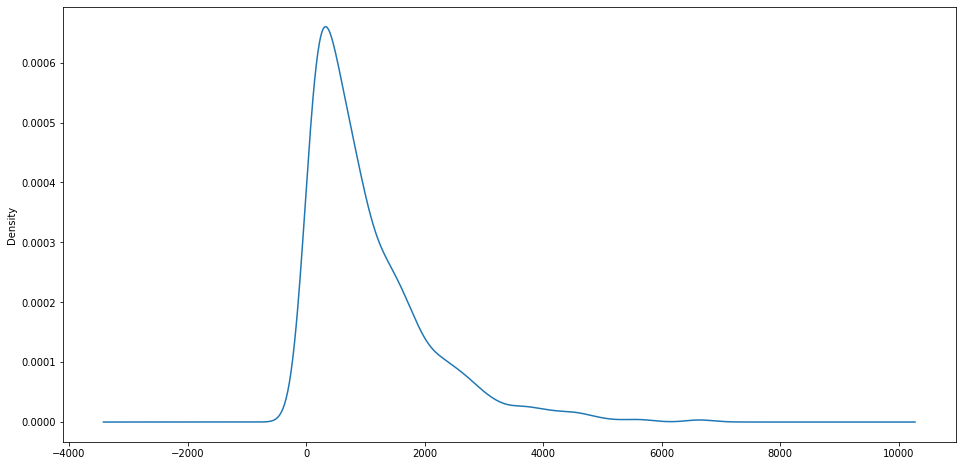

In [26]:
fig, ax = plt.subplots(figsize=(16,8))
unique_trans_count = trans_df.groupby('household_key')['BASKET_ID'].count().reset_index()
unique_trans_count['BASKET_ID'].plot.kde(ax=ax)

In [27]:
product_df = pd.read_csv('/home/adrien/Téléchargements/dunnhumby/product.csv')

In [28]:
product_df.head()

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,25671,2,GROCERY,National,FRZN ICE,ICE - CRUSHED/CUBED,22 LB
1,26081,2,MISC. TRANS.,National,NO COMMODITY DESCRIPTION,NO SUBCOMMODITY DESCRIPTION,
2,26093,69,PASTRY,Private,BREAD,BREAD:ITALIAN/FRENCH,
3,26190,69,GROCERY,Private,FRUIT - SHELF STABLE,APPLE SAUCE,50 OZ
4,26355,69,GROCERY,Private,COOKIES/CONES,SPECIALTY COOKIES,14 OZ


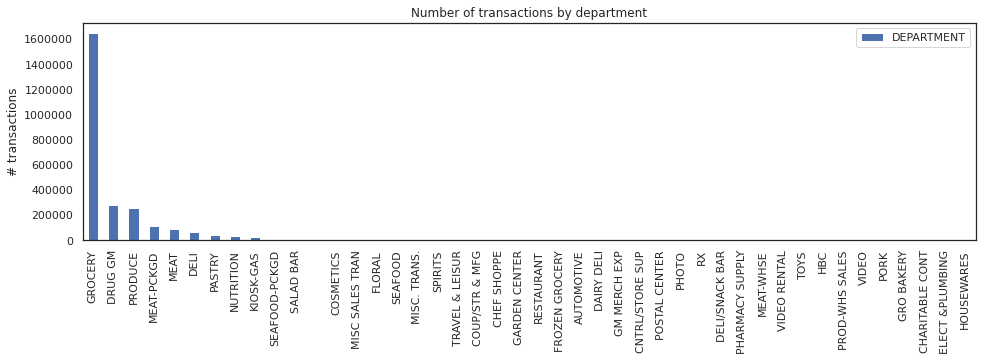

In [249]:
import matplotlib.ticker as ticker

departments_df = pd.DataFrame(grocery_df['DEPARTMENT'].value_counts())

fig, ax = plt.subplots(figsize=(16,4))
departments_df.plot.bar(ax=ax)

ax.set_title('Number of transactions by department')
ax.set_ylabel('# transactions')
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))

In [9]:
grocery_df = grocery_df.query('DEPARTMENT == "GROCERY"')

In [11]:
categories_df = pd.DataFrame(grocery_df['COMMODITY_DESC'].value_counts())
categories_df

,COMMODITY_DESC
SOFT DRINKS,117532
FLUID MILK PRODUCTS,85630
BAKED BREAD/BUNS/ROLLS,83232
CHEESE,74885
BAG SNACKS,67190
...,...
FROZEN CHICKEN,496
BIRD SEED,325
BOTTLE DEPOSITS,95
FRZN SEAFOOD,64


In [12]:
dfi.export(categories_df, "categories_df.png")

In [13]:
sub_categories_df = pd.DataFrame(grocery_df['SUB_COMMODITY_DESC'].value_counts())
sub_categories_df

,SUB_COMMODITY_DESC
FLUID MILK WHITE ONLY,65764
SOFT DRINKS 12/18&15PK CAN CAR,39352
YOGURT NOT MULTI-PACKS,37440
SFT DRNK 2 LITER BTL CARB INCL,37273
MAINSTREAM WHITE BREAD,27392
...,...
DESIGNER FRAGRANCES,1
COLOR SETS,1
BRITISH FOODS,1
SPICES,1


In [14]:
dfi.export(categories_df, "sub_categories_df.png")

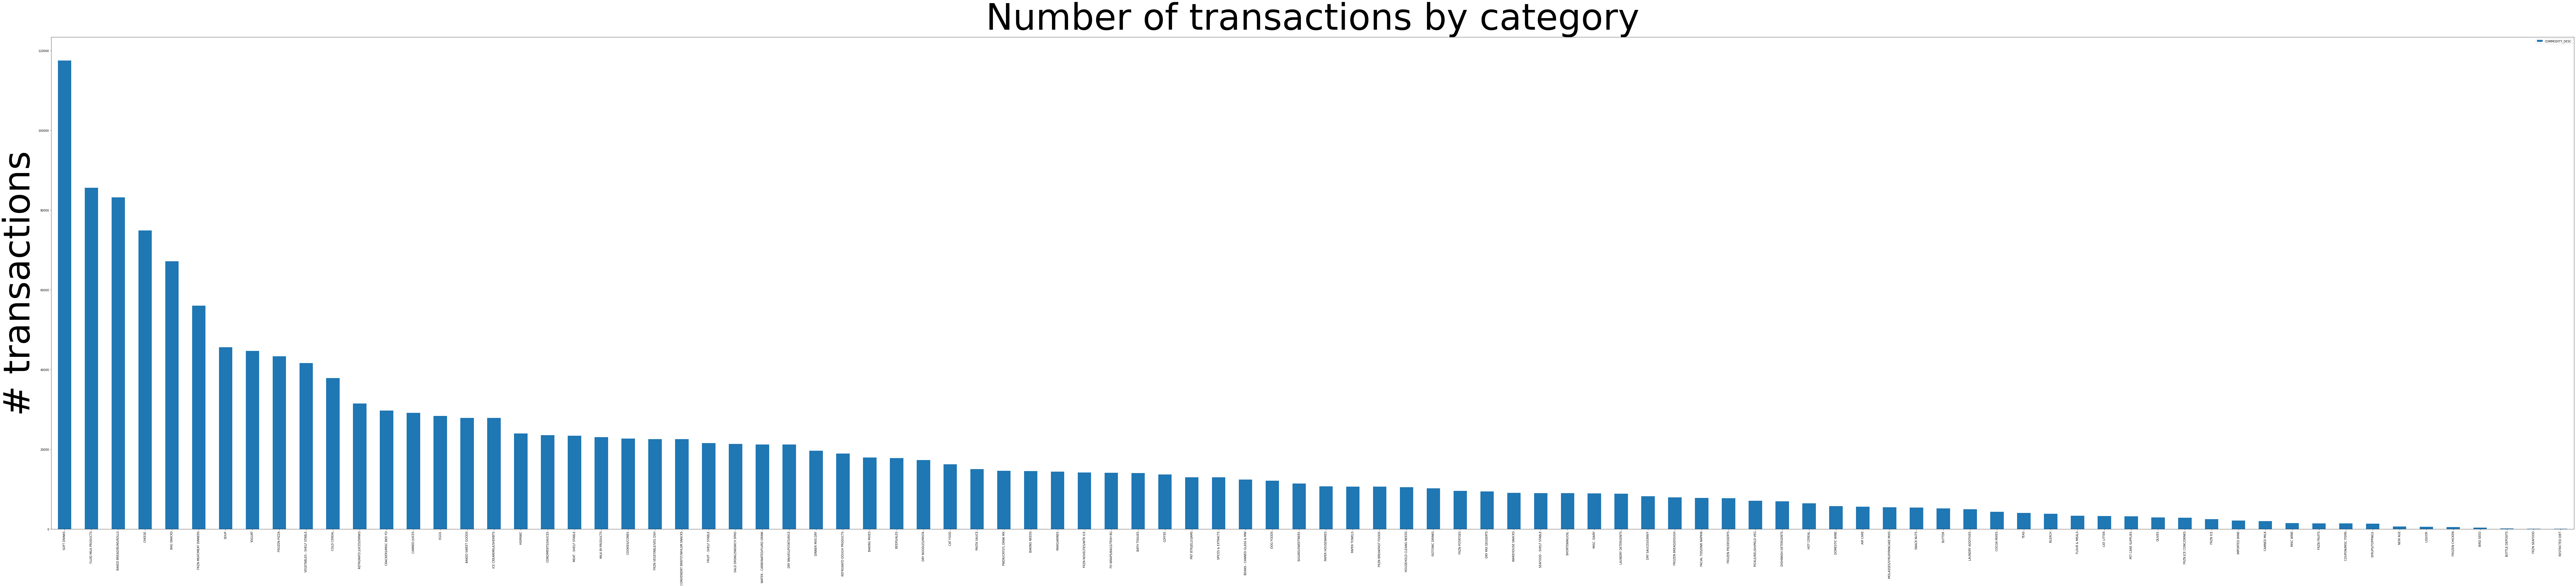

In [22]:
import matplotlib.ticker as ticker

categories_df = pd.DataFrame(grocery_df['COMMODITY_DESC'].value_counts())

fig, ax = plt.subplots(figsize=(160,32))
categories_df.plot.bar(ax=ax)

ax.set_title('Number of transactions by category', size=128)
ax.set_ylabel('# transactions', size=128)
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))

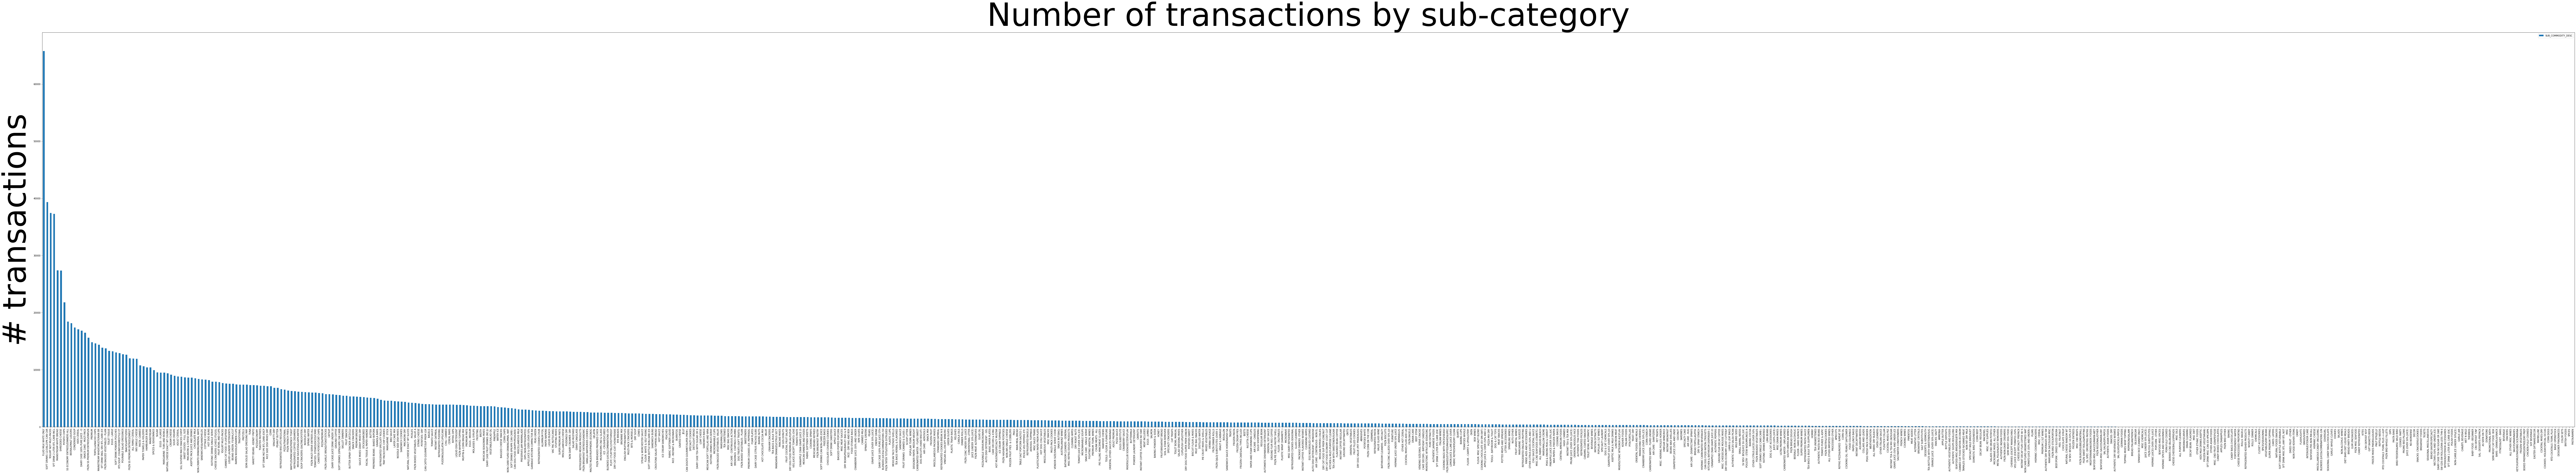

In [25]:
import matplotlib.ticker as ticker

sub_categories_df = pd.DataFrame(grocery_df['SUB_COMMODITY_DESC'].value_counts())

fig, ax = plt.subplots(figsize=(200,32))
sub_categories_df.plot.bar(ax=ax)

ax.set_title('Number of transactions by sub-category', size=140)
ax.set_ylabel('# transactions', size=140)
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))

In [31]:
product_df.set_index('PRODUCT_ID', inplace=True)

In [33]:
full_df = trans_df.join(product_df, on='PRODUCT_ID', how='inner')
full_df

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,1631,1,0.0,0.0,69,PRODUCE,Private,POTATOES,POTATOES RUSSET (BULK&BAG),5 LB
954,1929,27021022215,4,1004906,1,1.39,441,-0.60,1755,1,0.0,0.0,69,PRODUCE,Private,POTATOES,POTATOES RUSSET (BULK&BAG),5 LB
997,568,27021090189,4,1004906,1,1.39,446,-0.60,35,1,0.0,0.0,69,PRODUCE,Private,POTATOES,POTATOES RUSSET (BULK&BAG),5 LB
1836,887,27031467254,5,1004906,1,1.39,298,-0.60,1551,1,0.0,0.0,69,PRODUCE,Private,POTATOES,POTATOES RUSSET (BULK&BAG),5 LB
2295,175,27057508267,7,1004906,1,1.99,446,0.00,2303,2,0.0,0.0,69,PRODUCE,Private,POTATOES,POTATOES RUSSET (BULK&BAG),5 LB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2595727,1598,42305362535,711,92130,1,0.99,3228,0.00,1520,102,0.0,0.0,560,GROCERY,National,MARGARINES,MARGARINE: TUBS AND BOWLS,16 OZ
2595728,1598,42305362535,711,114102,1,8.89,3228,0.00,1520,102,0.0,0.0,2398,GROCERY,National,BEERS/ALES,BEERALEMALT LIQUORS,12 OZ
2595729,1598,42305362535,711,133449,1,6.99,3228,0.00,1520,102,0.0,0.0,2468,GROCERY,National,BEERS/ALES,BEERALEMALT LIQUORS,12 OZ
2595730,1598,42305362535,711,6923644,1,4.50,3228,-0.49,1520,102,0.0,0.0,2390,GROCERY,National,BEERS/ALES,BEERALEMALT LIQUORS,4PK/10 OZ


In [34]:
pd.DataFrame(full_df['DEPARTMENT'].value_counts())

,DEPARTMENT
GROCERY,1646076
DRUG GM,277232
PRODUCE,257290
MEAT-PCKGD,111957
MEAT,88416
DELI,62787
PASTRY,38179
NUTRITION,32164
KIOSK-GAS,22059
SEAFOOD-PCKGD,11216


In [14]:
grocery_df = full_df.loc[full_df['DEPARTMENT'] == 'GROCERY']

In [15]:
pd.DataFrame(grocery_df['COMMODITY_DESC'].value_counts())

,COMMODITY_DESC
SOFT DRINKS,117532
FLUID MILK PRODUCTS,85630
BAKED BREAD/BUNS/ROLLS,83232
CHEESE,74885
BAG SNACKS,67190
...,...
FROZEN CHICKEN,496
BIRD SEED,325
BOTTLE DEPOSITS,95
FRZN SEAFOOD,64


In [33]:
baskets_data = grocery_df.groupby(['BASKET_ID'])['COMMODITY_DESC'].value_counts()
baskets_data_df = pd.DataFrame(data=baskets_data.values, index=baskets_data.index, columns=['Count']).reset_index()
counts_df = baskets_data_df.pivot(index=['BASKET_ID'], columns=['COMMODITY_DESC'], values=['Count'])['Count']
counts_df.fillna(0, inplace=True)
counts_df = counts_df.astype(np.int)

In [34]:
dfi.export(counts_df, "counts_df.png", max_rows=10, max_cols=10)

In [16]:
baskets_data = grocery_df.groupby(['household_key', 'BASKET_ID'])['COMMODITY_DESC'].value_counts()
baskets_data_df = pd.DataFrame(data=baskets_data.values, index=baskets_data.index, columns=['Count']).reset_index()

In [17]:
counts_df = baskets_data_df.pivot(index=['household_key', 'BASKET_ID'], columns=['COMMODITY_DESC'], values=['Count'])['Count']
counts_df.fillna(0, inplace=True)

In [18]:
counts_df

COMMODITY_DESC             AIR CARE  BAG SNACKS  BAKED BREAD/BUNS/ROLLS  \
household_key BASKET_ID                                                   
1             27601281299       0.0         0.0                     1.0   
              27774192959       0.0         1.0                     1.0   
              28024266849       0.0         2.0                     0.0   
              28106322445       0.0         0.0                     1.0   
              28235481967       0.0         1.0                     2.0   
...                             ...         ...                     ...   
2500          42076591137       0.0         0.0                     0.0   
              42115225458       0.0         0.0                     0.0   
              42198526427       0.0         0.0                     1.0   
              42229520973       0.0         1.0                     0.0   
              42250641157       0.0         0.0                     0.0   

COMMODITY_DESC             BAKED SWEET GOODS  BAKING MIXES  BAKING NEEDS  \
household_key BASKET_ID                                                    
1             27601281299                0.0           0.0           0.0   
              27774192959                0.0           0.0           0.0   
              28024266849                1.0           0.0           0.0   
              28106322445                1.0           0.0           0.0   
              28235481967                0.0           0.0           0.0   
...                                      ...           ...           ...   
2500          42076591137                0.0           0.0           0.0   
              42115225458                0.0           0.0           0.0   
              42198526427                1.0           0.0           0.0   
              42229520973                0.0           0.0           0.0   
              42250641157                0.0           3.0           0.0   

COMMODITY_DESC             BATH TISSUES  BEANS - CANNED GLASS & MW  \
household_key BASKET_ID                                              
1             27601281299           1.0                        0.0   
              27774192959           0.0                        0.0   
              28024266849           0.0                        0.0   
              28106322445           0.0                        0.0   
              28235481967           1.0                        0.0   
...                                 ...                        ...   
2500          42076591137           0.0                        0.0   
              42115225458           1.0                        0.0   
              42198526427           1.0                        0.0   
              42229520973           0.0                        0.0   
              42250641157           0.0                        0.0   

COMMODITY_DESC             BEERS/ALES  BIRD SEED  ...  SOFT DRINKS  SOUP  \
household_key BASKET_ID                           ...                      
1             27601281299         0.0        0.0  ...          0.0   1.0   
              27774192959         0.0        0.0  ...          1.0   0.0   
              28024266849         0.0        0.0  ...          0.0   0.0   
              28106322445         0.0        0.0  ...          0.0   0.0   
              28235481967         0.0        0.0  ...          0.0   0.0   
...                               ...        ...  ...          ...   ...   
2500          42076591137         0.0        0.0  ...          0.0   0.0   
              42115225458         0.0        0.0  ...          0.0   0.0   
              42198526427         0.0        0.0  ...          0.0   0.0   
              42229520973         0.0        0.0  ...          0.0   0.0   
              42250641157         0.0        0.0  ...          0.0   0.0   

COMMODITY_DESC             SPICES & EXTRACTS  SUGARS/SWEETNERS  \
household_key BASKET_ID                                          
1  